In [ ]:
В разделе 6.2 используем рекуррентные сети (сначала SimpleRNN, а затем LSTM)
для задачиклассификации отзывов IMDB. Получаем соответственно 85 и 89% точность.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
from keras.datasets import imdb
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
np.load = np_load_old

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6260 - acc: 0.6333 - val_loss: 0.5373 - val_acc: 0.7414
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3946 - acc: 0.8331 - val_loss: 0.3864 - val_acc: 0.8326
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2787 - acc: 0.8908 - val_loss: 0.4391 - val_acc: 0.7902
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2028 - acc: 0.9242 - val_loss: 0.4023 - val_acc: 0.8438
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1469 - acc: 0.9464 - val_loss: 0.4415 - val_acc: 0.8510
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0923 - acc: 0.9696 - val_loss: 0.4523 - val_acc: 0.8186
Epoch 7/1

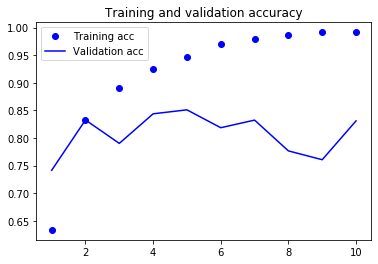

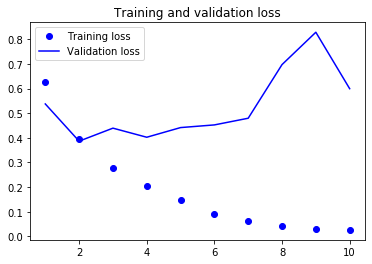

In [4]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [5]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.5085 - acc: 0.7624 - val_loss: 0.3331 - val_acc: 0.8614
Epoch 2/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.2933 - acc: 0.8856 - val_loss: 0.3862 - val_acc: 0.8264
Epoch 3/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2352 - acc: 0.9109 - val_loss: 0.3766 - val_acc: 0.8738
Epoch 4/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1968 - acc: 0.9252 - val_loss: 0.3975 - val_acc: 0.8386
Epoch 5/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1766 - acc: 0.9354 - val_loss: 0.2911 - val_acc: 0.8898
Epoch 6/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1571 - acc: 0.9435 - val_loss: 0.4194 - val_acc: 0.8760
Epoch 7/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1450 - acc: 0.9482 - val_loss: 0.3497 - val_acc:

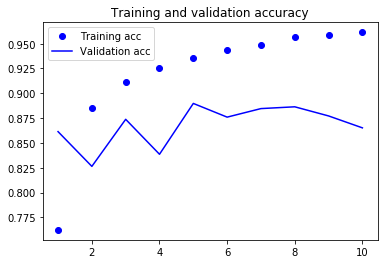

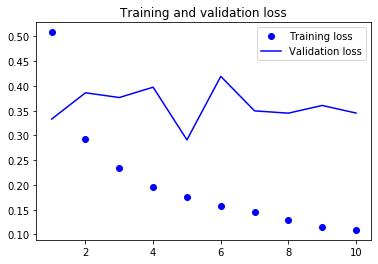

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()